# Initial definitions

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
# Base directory = directory where this script lives
BASE_DIR = Path().resolve().parent
print(BASE_DIR)

/rds/user/hc682/hpc-work/AWE_scratch/gas-code-test-master


# Plot a single realisation of the code 

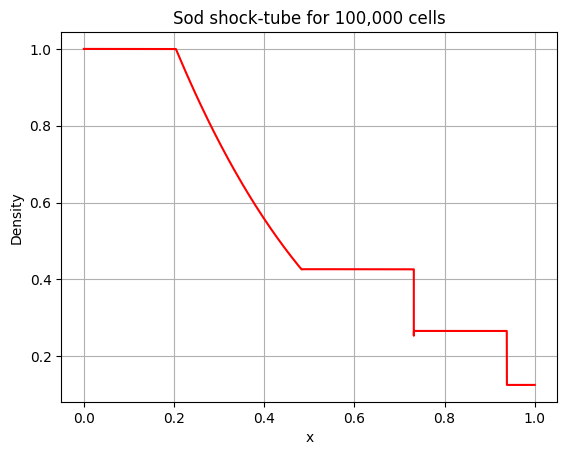

In [34]:
data_file = BASE_DIR / "realisations" / "100kcells.csv"
out_file = BASE_DIR / "img" / "plot100kcells.png"

# Read CSV file into DataFrame
df = pd.read_csv(data_file, header=None, names=["x", "Density"])
# Access as Series
x = df["x"]
y = df["Density"]


# Plot
plt.plot(x, y, linestyle="-", color="red")  # Red color for markers

plt.xlabel("x")
plt.ylabel("Density")
plt.title("Sod shock-tube for 100,000 cells")
plt.grid()
plt.show()
# plt.savefig(out_file, dpi=375)

# Plot threads vs execution time and efficiency

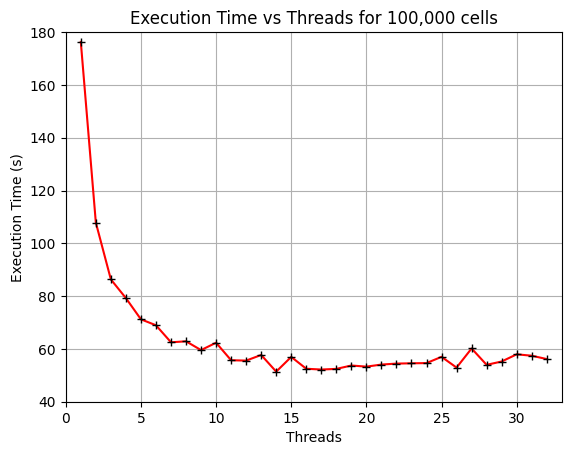

In [35]:
data_file = BASE_DIR / "var_thread" / "varthreads_100000_cells.csv"
out_file = BASE_DIR / "img" / "plot100kcellsvarthreads.png"

# Read CSV file into DataFrame
df = pd.read_csv(data_file)

# Assuming the CSV has columns named 'Threads' and 'ExecutionTime' (adjust accordingly)
xs = df['threads']
ys = df['execution_time_sec']

plt.plot(xs, ys, marker="+", linestyle="-", color="red",markeredgecolor="k")  # Red color for markers

# Set axis limits 
plt.xlim(0, 33)  # Change as needed
plt.ylim(40, 180)  # Change as needed

plt.xlabel("Threads")
plt.ylabel("Execution Time (s)")
plt.title("Execution Time vs Threads for 100,000 cells")
plt.grid(True)

# Save plot
# plt.savefig(out_file, dpi=375)

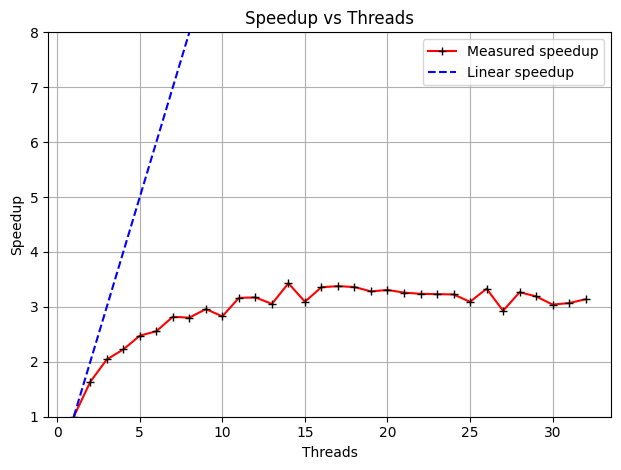

In [38]:

# Serial time (1 thread)
T1 = df.loc[df['threads'] == 1, 'execution_time_sec'].iloc[0]
# Extract threads and execution times
threads = df['threads']
times = df['execution_time_sec']
# Compute speedup
df['speedup'] = T1 / times

# Plot speedup
plt.plot(df['threads'], df['speedup'],  marker="+", linestyle="-", color="red",markeredgecolor="k", label='Measured speedup')  # Red color for markers
plt.plot(df['threads'], df['threads'], linestyle='--', color='blue', label='Linear speedup')

plt.xlabel("Threads")
plt.ylabel("Speedup")
plt.title("Speedup vs Threads")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.ylim([1,8])
plt.show()

# Amdahl's Law

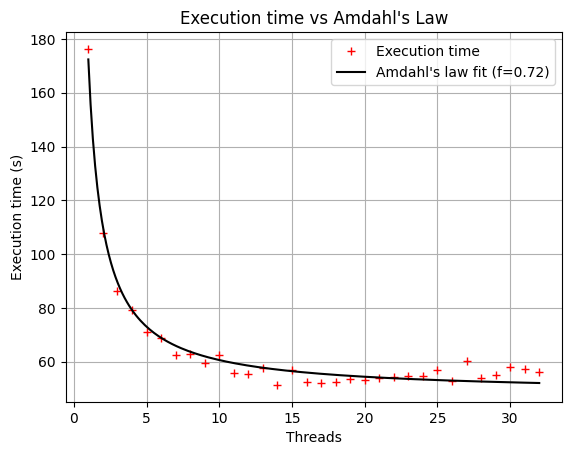

In [ ]:
threads = df["threads"].to_numpy()
times = df["execution_time_sec"].to_numpy()

#Define Amdahl's law function
def amdahl(t, f, T1):
    """
    t: number of threads
    f: parallel fraction
    T1: serial execution time
    """
    return T1 * ((1 - f) + f / t)

# Fit curve to data
popt, pcov = curve_fit(amdahl, threads, times, bounds=([0, 0], [1, np.inf]))
f_fit, T1_fit = popt
t_smooth = np.linspace(1, max(threads), 200)
times_fit = amdahl(t_smooth, f_fit, T1_fit)

#Plot
plt.plot(threads, times, "r+", label="Execution time")
plt.plot(t_smooth, times_fit, "k-", label=f"Amdahl's law fit (f={f_fit:.2f})")
plt.xlabel("Threads")
plt.ylabel("Execution time (s)")
plt.title("Execution time vs Amdahl's Law")
plt.legend()
plt.grid(True)
plt.show()